# Отчет по работе четрёх алгоритмов поиска подстроки в строке.



## Для этого я выбрал 4 алгоритма:



1. Алгоритм "brute force";
2. Алгоритм Раббина-Карпа;
3. Алгоритм Бойера-Мура-Хорспула;
4. Алгоритм Кнута-Морриса-Пратта.

### Вкратце о работе алгоритмах и оценка их сложности 

**Начнем с алгоритма Кнута-Морриса-Пратта.**  

Рассмотрим сравнение строк на позиции i, где образец S[0,m-1]
сопоставляется с частью текста T[i,i+m-1]. Предположим, что первое несовпадение произошло между T[i+j] и S[j] где  1<j<m. Тогда T[i,i+j-1]=S[0,j-1]=P и a=T[i+j] != S[j]=b.

При сдвиге вполне можно ожидать, что префикс (начальные символы) образца S сойдется с каким-нибудь суффиксом (конечные символы) текста P. Длина наиболее длинного префикса, являющегося одновременно суффиксом, есть значение префикс-функции от строки S для индекса j.

Это приводит нас к следующему алгоритму: пусть l[j] — значение префикс-функции от строки S[0,m-1] для индекса j. Тогда после сдвига мы можем возобновить сравнения с места T[i+j] и S[l[j]] без потери возможного местонахождения образца. Можно показать, что таблица l может быть вычислена (амортизационно) за **O(m)** сравнений перед началом поиска. А поскольку строка T будет пройдена ровно один раз, суммарное время работы алгоритма будет равно **O(m+n)**, где n — длина текста T.

Подробнее об работе алгоритма можно почитать [тут](https://ru.wikipedia.org/wiki/Алгоритм_Кнута_—_Морриса_—_Пратта)


**Далее немного об алгоритме Раббина-Карпа.**  

Алгоритм ищет подстроку в строке используя хеширование. Считая хеш подстрок можно легко получить переполнение. Поэтому, что бы его не было используется модульная арифметика. Но тут есть нюанс, если хешей слишком много, то можно получить коллизии.Другие алгоритмы могут искать одиночный образец за время O(n), и следовательно, они могут быть использованы для поиска k образцов за время O(n k). В противоположность им, вариант алгоритма Рабина — Карпа выше может найти все k образцов за ожидаемое время **O(n+k)**, потому что хеш-таблица, используемая для проверки случая, когда хеш подстроки равен хешу любого из образцов, использует **O(1)** времени. Опять же оставлю пару ссылок, где можно подробнее почитать об алгоритме на [википедии](https://ru.wikipedia.org/wiki/Алгоритм_Рабина_—_Карпа) и о скольлящем хеше можно почитать [тут](https://nuancesprog.ru/p/10452/) 

**Далее рассмотрим алгоритм Бойера-Мура-Хорспула.**

*Описание работы алгоритма*:

1. Сканирование слева направо, сравнение в режиме «чёрного ящика». Как и в примитивном алгоритме, совмещается начало текста и шаблона, проводится сравнение обычной процедурой «сравнить участки памяти». Если все символы шаблона совпали с наложенными символами строки, значит, подстрока найдена, и поиск окончен.

Если же какой-то символ шаблона не совпадает с соответствующим символом строки, шаблон сдвигается на несколько символов вправо. Эти «несколько» выбираются в соответствии с такой эвристикой.

2. Изменённая эвристика стоп-символа. Берём символ текста, оказавшийся над последним символом шаблона (независимо от того, где случилось несовпадение!). 

Сдвигаем шаблон так, чтобы под стоп-символом оказалась буква «b» шаблона. Это реализуется с помощью таблицы смещений: для каждого символа алфавита храним максимально возможный сдвиг, не пропускающий стоп-символ. То есть (при нумерации строк с 1): shift(c) = |needle|−lastpos(c, needle[1..|needle|−1]), где lastpos — последнее вхождение символа в строку, needle[a..b] — операция взятия подстроки.

Для символов, не вошедших в шаблон, величина смещения устанавливается равной длине шаблона. Последний символ шаблона при вычислении таблицы смещений не рассматривается (чревато зацикливанием).

Алгоритм торгует пространством для времени, чтобы получить среднюю сложность **O (n)** для случайного текста, хотя в худшем случае он имеет **O (nm)**, где длина шаблона равна m, а длина строки поиска равна n.

По традиции оставляю ссылку на [википедию](https://ru.wikipedia.org/wiki/Алгоритм_Бойера_—_Мура_—_Хорспула)

**Последний на очереди это обычный переборный алгоритм**

Алгоритм работает таким образом: проверяет с начала строки совпадение с подстрокой, если оно найдено сдвиг вправо в оригинальной строке и подстроке, если не найдено, сдвиг в начало только в подстроке и так до конца строки, в которой осуществляется поиск. Сложность алгоритма **O(nm)**, где n- длина строки в которой осуществляется поиск, m - длина паттерна



# Перейдем к тестам #

## Начнем с замеров по времени ##

На графике ниже можно увидеть среднее время работы алгоритмов на трёх томах "Войны и мир", искомый паттерн **просто**. Учтите: замеры не точные, потому что есть зависимость от той машины, на какой вы делаете замеры. Но примерная картина такая:


Text(0.5, 1.0, 'Замеры по времени')

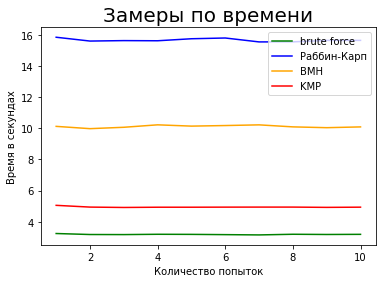

In [9]:
%matplotlib inline

from matplotlib import pyplot as plt
import for_graphs 

fig, ax = plt.subplots()
a = for_graphs.get_data()

ax.plot([1,2,3,4,5,6,7,8,9,10], a[0], color='green', label='brute force')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[1], color='blue', label='Раббин-Карп')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[2], color='orange', label='BMH')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[3], color='red', label='KMP')

ax.legend()
ax.set_xlabel("Количество попыток")
ax.set_ylabel("Время в секундах")

ax.set_title('Замеры по времени', fontsize=20)

## Далее замер по памяти ##

Аналогично с замером по времени, все 4 алгоритма отражены на графике ниже:

Text(0.5, 1.0, 'Замеры по памяти')

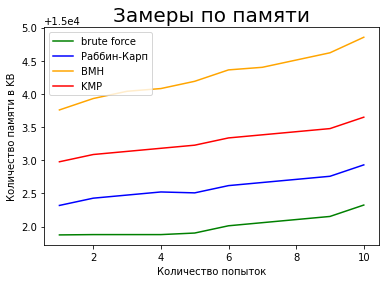

In [10]:
%matplotlib inline

from matplotlib import pyplot as plt
import for_graphs 

fig, ax = plt.subplots()
a = for_graphs.get_data()

ax.plot([1,2,3,4,5,6,7,8,9,10], a[4], color='green', label='brute force')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[5], color='blue', label='Раббин-Карп')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[6], color='orange', label='BMH')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[7], color='red', label='KMP')

ax.legend()
ax.set_xlabel("Количество попыток")
ax.set_ylabel("Количество памяти в KB")

ax.set_title('Замеры по памяти', fontsize=20)

## Еще тесты

Далее я заупстил поиск по тому же самому тексту, но паттерн "необычный случай был" как видно на графике ниже, на большом паттерне алгоритм прямого поиска справляется хуже, но все же неплох, алгоритма BMH показывает лучший результат. По памяти нет особых различий.

Text(0.5, 1.0, 'Замеры по времени')

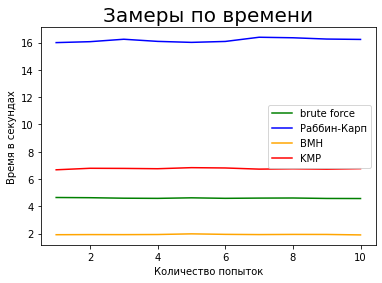

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import for_graphs 

fig, ax = plt.subplots()
a = for_graphs.get_data()

ax.plot([1,2,3,4,5,6,7,8,9,10], a[0], color='green', label='brute force')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[1], color='blue', label='Раббин-Карп')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[2], color='orange', label='BMH')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[3], color='red', label='KMP')

ax.legend()
ax.set_xlabel("Количество попыток")
ax.set_ylabel("Время в секундах")

ax.set_title('Замеры по времени', fontsize=20)

Text(0.5, 1.0, 'Замеры по памяти')

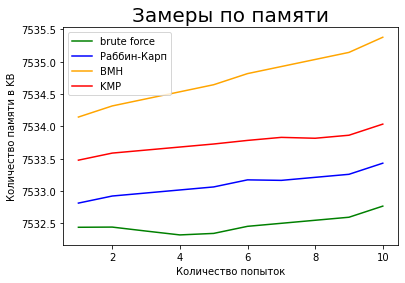

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import for_graphs 

fig, ax = plt.subplots()
a = for_graphs.get_data()

ax.plot([1,2,3,4,5,6,7,8,9,10], a[4], color='green', label='brute force')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[5], color='blue', label='Раббин-Карп')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[6], color='orange', label='BMH')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[7], color='red', label='KMP')

ax.legend()
ax.set_xlabel("Количество попыток")
ax.set_ylabel("Количество памяти в KB")

ax.set_title('Замеры по памяти', fontsize=20)

# Тесты на динамически расширяемом паттерне:

В данных тестах я запустил каждый алгоритм 10 раз. В качестве паттерна я использовал предложение "Веретена с разных сторон равномерно и не умолкая шумели.", разбив его предварительно на слова и при каждом запуске в паттерн добавлял следующее слово, включая ".". Результаты, как обычно, ниже:)

Text(0.5, 1.0, 'Замеры по времени')

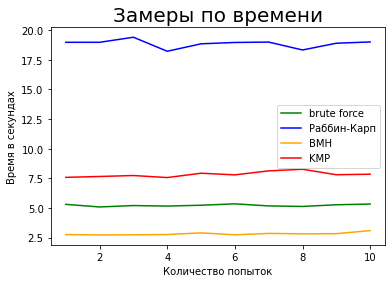

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import for_graphs 

fig, ax = plt.subplots()
a = for_graphs.get_data()

ax.plot([1,2,3,4,5,6,7,8,9,10], a[0], color='green', label='brute force')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[1], color='blue', label='Раббин-Карп')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[2], color='orange', label='BMH')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[3], color='red', label='KMP')

ax.legend()
ax.set_xlabel("Количество попыток")
ax.set_ylabel("Время в секундах")

ax.set_title('Замеры по времени', fontsize=20)

Text(0.5, 1.0, 'Замеры по памяти')

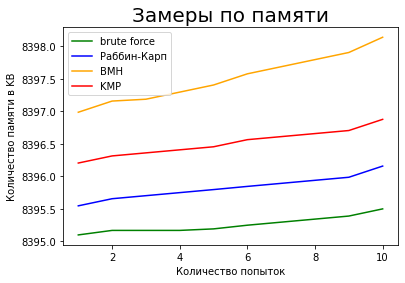

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt
import for_graphs 

fig, ax = plt.subplots()
a = for_graphs.get_data()

ax.plot([1,2,3,4,5,6,7,8,9,10], a[4], color='green', label='brute force')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[5], color='blue', label='Раббин-Карп')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[6], color='orange', label='BMH')
ax.plot([1,2,3,4,5,6,7,8,9,10], a[7], color='red', label='KMP')

ax.legend()
ax.set_xlabel("Количество попыток")
ax.set_ylabel("Количество памяти в KB")

ax.set_title('Замеры по памяти', fontsize=20)

## Дополнительная информация и краткий вывод ##

Более подробно, а именно самый "жирный" блок памяти и количество вхождений и самое первое вхождение можно посмотреть в файле "out.txt" в директории проекта.

**Алгоритм прямого поиска** является малозатратным и не нуждается в предварительной обработке и в дополнительном пространстве. Но на очень больших файлах он будет уступать остальным алгоритмам. Если p(паттерн) достаточно мало по сравнению с t(текстом), то асимптотика будет близкой к O(t), что позволяет использовать его на практике в случаях, когда паттерн много меньше текста (например, Ctrl+F в браузерах). В худшем случе его сложность **O(t^2)**.

**Алгоритм Раббина-Карпа** использует хэширование, что снижает скорость в среднем из-за высчитывания хеша, но его можно модифицировать для поиска нескольких паттернов. Сложность наихудшего случая этого алгоритма по-прежнему O (t*p). Однако, если мы используем хорошую функцию хеширования, ожидаемая сложность станетO(t + p*l), где l - количество совпадений. Причина этого заключается в том, что хорошая функция хеширования редко вызывает коллизии. Поэтому нам редко нужно сравнивать две подстроки, когда нет совпадения. Кроме того, если мы только хотим проверить, существует ли шаблон или нет, сложность станет **O(t+p)**, потому что мы можем сломаться после первого появления.

**Алгоритм Бойера-Мура-Хорспулла** единственный из перечисленных алгоритмов который использует обратный поиск. Для него используется таблица сдвигов. На деле он является самым затраным по памяти и не самым быстрым по времени на этих тестах. Но в целом, если использовать другой паттерн, будет работать быстрее.

**Алгоритм Кнута-Морриса-Пратта** Использует префикс функцию. На наших тестах показал 2 резултат по времени и 3 по использованию памяти.

Вывод каков: если нужно искать небольшой паттерн, то лучше всего использовать обычный прямой поиск, он не затратен по памяти и по времени. Если же паттерн "большой", то лучше всего использовать BMH, если нужно быстро осуществить поиск, но он затратен по памяти. Алгоритм KMP показал нелохой результат и по памяти и по времени на "большом" паттерне и по скорости и по времени. А алгоритма Раббина-Карпа не очень эффективен на любом паттерне по времени, но показывает неплохой результат по памяти на обоих тестах. 